In [1]:
from models.TernausNet import *

import matplotlib.pyplot as plt
import numpy as np
import os
import time

Using TensorFlow backend.


# Load Data

In [2]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(213, 64, 64, 1) (213, 64, 64, 1)
(54, 64, 64, 1) (54, 64, 64, 1)


# Segmentation Class U-Net

In [3]:
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 1,learning_rate = 2e-4)

In [4]:
seg_model.show_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 128)  73856       max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

# Train Model

In [5]:
history = seg_model.train(x_train, y_train, epoch = 100, batch_size = 64)

Train on 170 samples, validate on 43 samples
Epoch 1/100
170/170 [==============================] - 73s 431ms/step - loss: 0.6304 - dice_coef: 0.2827 - val_loss: 0.5819 - val_dice_coef: 0.2221
Epoch 2/100
170/170 [==============================] - 0s 3ms/step - loss: 0.5560 - dice_coef: 0.2516 - val_loss: 0.4937 - val_dice_coef: 0.2738
Epoch 3/100
170/170 [==============================] - 0s 3ms/step - loss: 0.4562 - dice_coef: 0.3197 - val_loss: 0.3611 - val_dice_coef: 0.4167
Epoch 4/100
170/170 [==============================] - 0s 3ms/step - loss: 0.3500 - dice_coef: 0.4666 - val_loss: 0.3545 - val_dice_coef: 0.4882
Epoch 5/100
170/170 [==============================] - 0s 3ms/step - loss: 0.3390 - dice_coef: 0.5442 - val_loss: 0.2960 - val_dice_coef: 0.6028
Epoch 6/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2993 - dice_coef: 0.5995 - val_loss: 0.2465 - val_dice_coef: 0.6313
Epoch 7/100
170/170 [==============================] - 0s 3ms/step - loss: 0.2601 

Epoch 57/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0473 - dice_coef: 0.9400 - val_loss: 0.0764 - val_dice_coef: 0.9269
Epoch 58/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0509 - dice_coef: 0.9389 - val_loss: 0.0736 - val_dice_coef: 0.9284
Epoch 59/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0504 - dice_coef: 0.9413 - val_loss: 0.0748 - val_dice_coef: 0.9289
Epoch 60/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0473 - dice_coef: 0.9428 - val_loss: 0.0698 - val_dice_coef: 0.9303
Epoch 61/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0442 - dice_coef: 0.9423 - val_loss: 0.0707 - val_dice_coef: 0.9288
Epoch 62/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0455 - dice_coef: 0.9437 - val_loss: 0.0722 - val_dice_coef: 0.9319
Epoch 63/100
170/170 [==============================] - 0s 3ms/step - loss: 0.0441 - dice_coef: 0.9457 - val_loss: 0.0723 - 

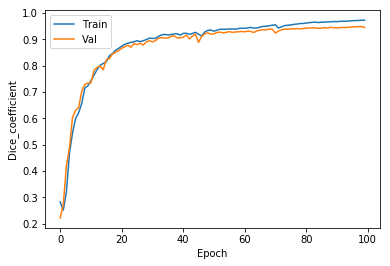

In [6]:
plot_dice(history)

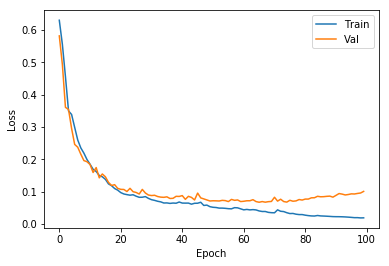

In [7]:
plot_loss(history)

# Show result

In [8]:
preds = seg_model.predict(x_test)

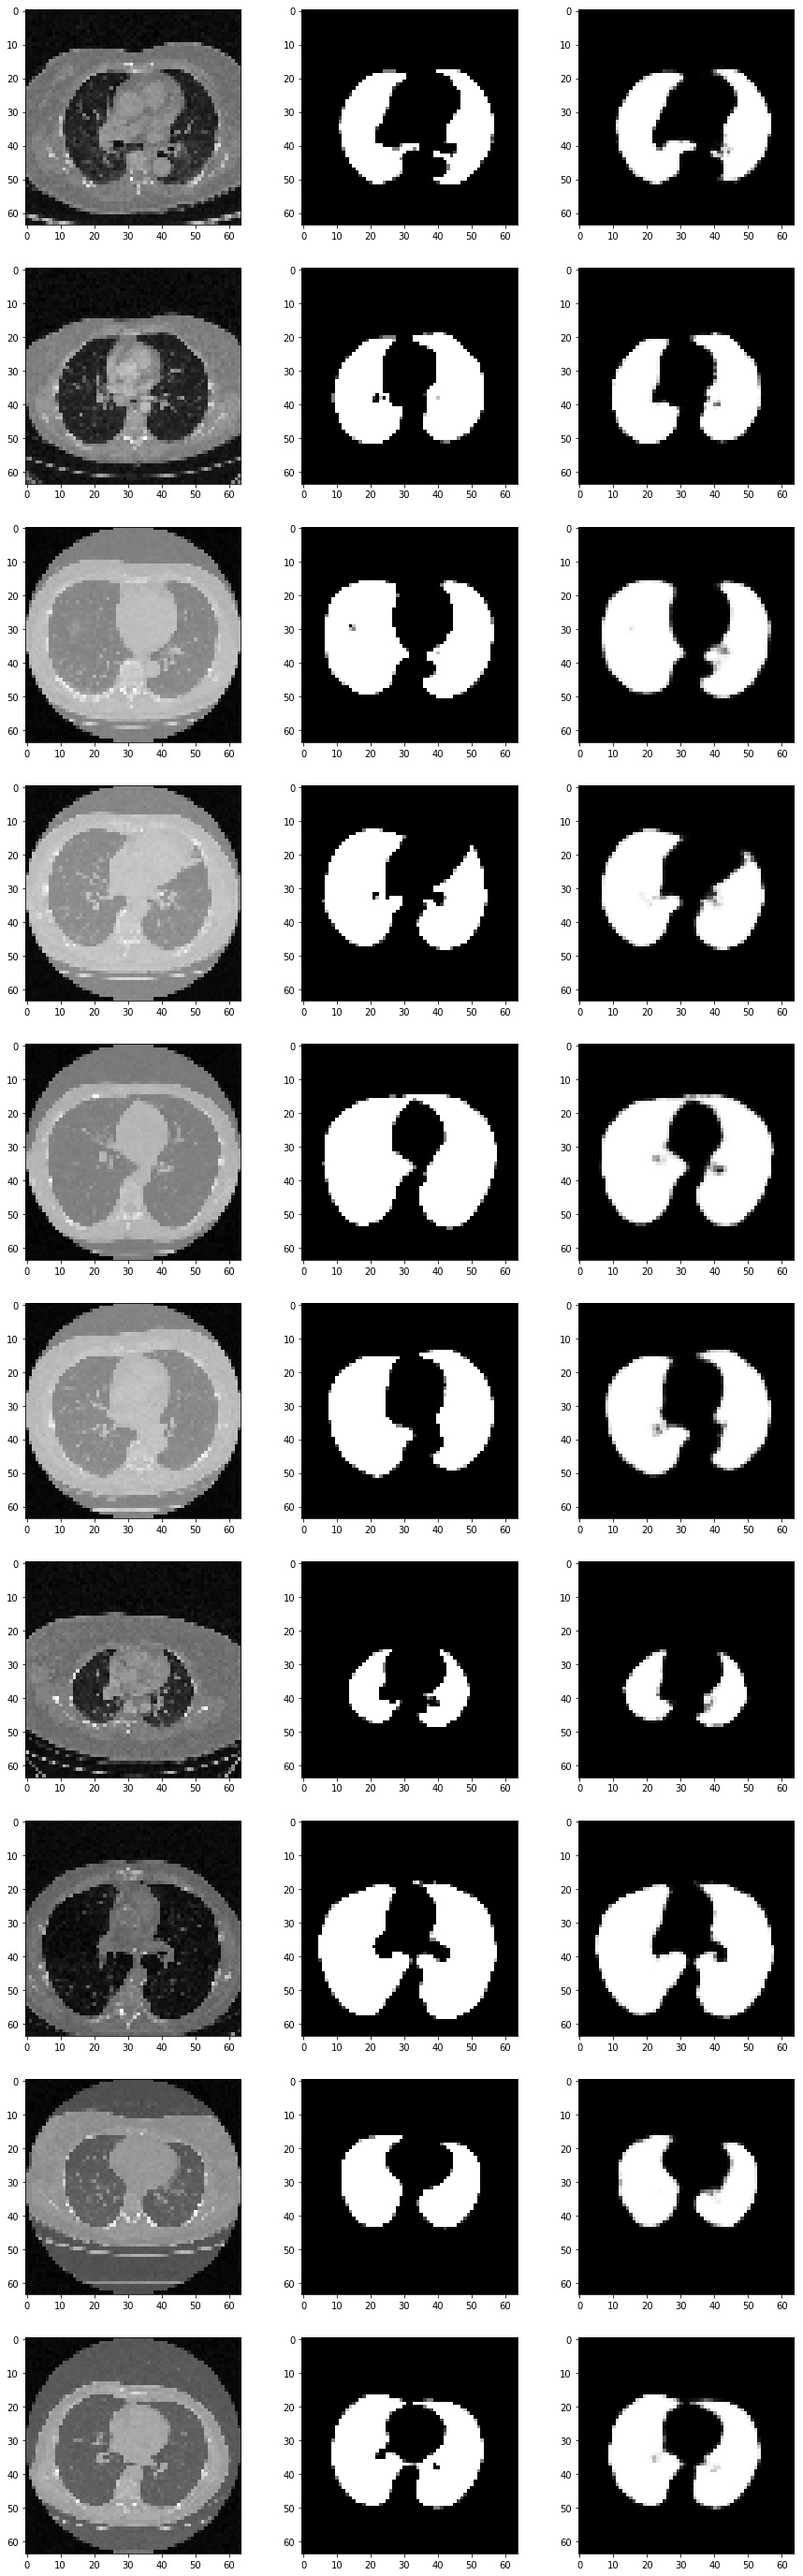

In [9]:
show_num = 10
fig, ax = plt.subplots(show_num, 3, figsize=(15, 50))

for i, pred in enumerate(preds[:show_num]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')